In [1]:
import numpy as np
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [75]:
table = pd.read_excel('check.xlsx',delimiter="\t")

In [76]:
table.head()

,1.1日,1.2日,1.3日,1.4日,1.5日,1.6日,1.7日,1.8日,1.9日,1.10日,...,1.26日,1.27日,1.28日,1.29日,1.30日,1.31日,2.1日,2.2日,2.3日,2.4日
到达时间,NaN,A,C,C,B,E,E,B,C,NaN,...,D,NaN,E,D,C,C,C,B,E,E
离开时间,NaN,10,9,8,10,6,6,7,10,NaN,...,5,NaN,5,9,8,10,8,3,8,7
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
到达时间,D,B,A,A,B,NaN,C,C,B,B,...,B,NaN,B,A,B,B,B,B,B,B
离开时间,10,10,10,10,10,NaN,10,7,10,10,...,NaN,NaN,NaN,10,NaN,10,8,7,NaN,NaN


In [77]:
table_arr = np.array(table).astype('S')
table_arr

array([['nan', 'A', 'C', ..., 'B', 'E', 'E'],
       ['nan', '10', '9', ..., '3', '8', '7'],
       ['nan', 'nan', 'nan', ..., 'nan', 'nan', 'nan'],
       ..., 
       ['nan', 'nan', 'nan', ..., 'nan', 'nan', 'nan'],
       ['nan', 'nan', 'nan', ..., 'B', 'nan', 'nan'],
       ['nan', 'nan', 'nan', ..., 'nan', 'nan', 'nan']],
      dtype='|S3')

In [13]:
table_arr =='nan'

array([[ True, False, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False],
       [ True,  True,  True, ...,  True,  True,  True],
       ..., 
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ..., False,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]], dtype=bool)

In [201]:
name_list = ['徐知彧','朱昱敏','曹静怡','徐港','史斌斌','李洋','王思琦','谈畅','胡博钦','陈旭鹏','陈欣铎','王承浩','邢耀光','史真'
             '杜超','胡文奇','李慧一']

In [15]:
time_list = np.array([8.15,8.45,9.15,9.45,10.5,17.45,18.15,18.45,19.15,19.45,20.15,20.45,21.15,21.45,22.5])

In [16]:
time_str = np.array(['8:00-8:30','8:30-9:00','9:00-9:30','9:30-10:00','10:00-','17:30-18:00','18:00-18:30','18:30-19:00',
            '19:00-19:30','19:30-20:00','20:00-20:30','20:30-21:00','21:00-21:30','21:30-22:00','22:00-'])

In [17]:
alphabet = np.array(['A','B','C','D','E','1','2','3','4','5','6','7','8','9','10'])

In [18]:
name_list = []

In [59]:
time_str[np.where(alphabet ==table_arr[0,1])[0][0]]

'8:00-8:30'

In [147]:
def update_table(table):
    shape0,shape1 = table.shape
    str_table = np.repeat('nan',shape0*shape1).reshape(shape0,shape1).astype('S11')
    float_table = np.repeat(np.nan,shape0*shape1).reshape(shape0,shape1)
    for i in range(shape0):
        for j in range(shape1):
            if table[i,j] !='nan':
                str_table[i,j] = time_str[np.where(alphabet ==table[i,j])[0][0]]
                float_table[i,j] = time_list[np.where(alphabet ==table[i,j])[0][0]]
    return str_table,float_table

In [148]:
str_table,float_table = update_table(table_arr)

In [68]:
str_table

array([['nan', '8:00-8:30', '9:00-9:30', ..., '8:30-9:00', '10:00-',
        '10:00-'],
       ['nan', '22:00-', '21:30-22:00', ..., '18:30-19:00', '21:00-21:30',
        '20:30-21:00'],
       ['nan', 'nan', 'nan', ..., 'nan', 'nan', 'nan'],
       ..., 
       ['nan', 'nan', 'nan', ..., 'nan', 'nan', 'nan'],
       ['nan', 'nan', 'nan', ..., '8:30-9:00', 'nan', 'nan'],
       ['nan', 'nan', 'nan', ..., 'nan', 'nan', 'nan']],
      dtype='|S11')

In [149]:
float_table

array([[   nan,   8.15,   9.15, ...,   8.45,  10.5 ,  10.5 ],
       [   nan,  22.5 ,  21.45, ...,  18.45,  21.15,  20.45],
       [   nan,    nan,    nan, ...,    nan,    nan,    nan],
       ..., 
       [   nan,    nan,    nan, ...,    nan,    nan,    nan],
       [   nan,    nan,    nan, ...,   8.45,    nan,    nan],
       [   nan,    nan,    nan, ...,    nan,    nan,    nan]])

In [159]:
np.array([np.nan])[0]

nan

In [168]:
float_table[:2,:]

array([[   nan,   8.15,   9.15,   9.15,   8.45,  10.5 ,  10.5 ,   8.45,
          9.15,    nan,   9.45,   9.45,    nan,  10.5 ,   9.15,   9.15,
          9.15,   9.15,   9.15,   9.45,   9.45,   9.15,   8.45,   9.15,
           nan,   9.45,    nan,  10.5 ,   9.45,   9.15,   9.15,   9.15,
          8.45,  10.5 ,  10.5 ],
       [   nan,  22.5 ,  21.45,  21.15,  22.5 ,  20.15,  20.15,  20.45,
         22.5 ,    nan,  22.5 ,  22.5 ,    nan,  18.45,  22.5 ,    nan,
         22.5 ,  21.15,  22.5 ,  20.15,  21.45,  22.5 ,  21.45,  21.45,
           nan,  19.45,    nan,  19.45,  21.45,  21.15,  22.5 ,  21.15,
         18.45,  21.15,  20.45]])

In [169]:
str(float_table[0,0]) =='nan'

True

In [193]:
def count_time(row):
    '''
    input two rows from one person
    row
    '''
    list = []
    for i in range(35):
        if (str(row[0][i])!='nan') and (str(row[1][i]) !='nan'):
            list.append(float(row[1][i])-float(row[0][i]))
    return list

In [196]:
list_per = []
for i in range(16):
    list_per.append(sum(count_time(float_table[3*i:3*i+2,:]))/len(count_time(float_table[3*i:3*i+2,:])))

In [200]:
list_per.append(9)

In [ ]:
name_list = ['徐知彧','朱昱敏','曹静怡','徐港','史斌斌','李洋','王思琦','谈畅','胡博钦','陈旭鹏','陈欣铎','王承浩','邢耀光','史真'
             '杜超','胡文奇','李慧一']

In [235]:
name_list =['XU Zhiyu','Zhu Yumin','Cao Jingyi','Xu Gang','Shi Binbin','Li Yang','Wang Siqi','Tan Chang','Hu Boqin',
            'Chen Xupeng','Chen Xinduo','Wang Chenghao','Xing Yaoguang','Shi Zhen','Du Chao','Hu Wenqi','Li Huiyi']

In [268]:
aaa =a.astype('S4')

In [275]:
aaa = aaa.astype('float')

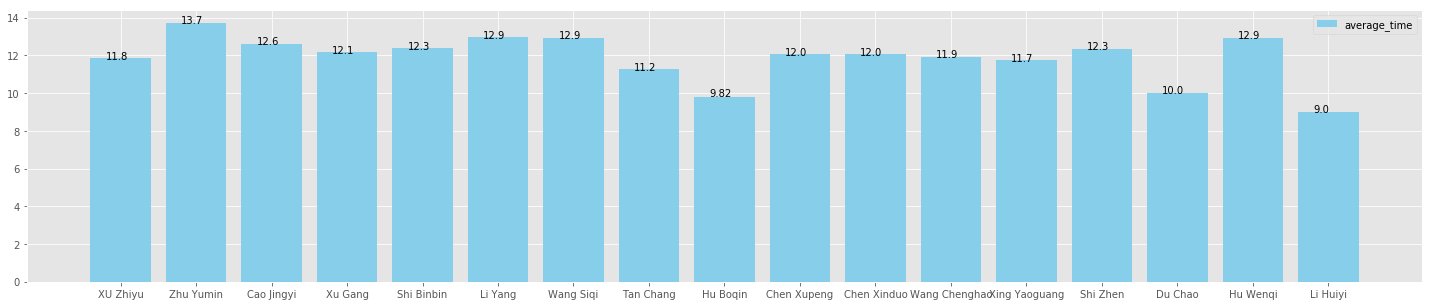

In [276]:
size = 17
x = np.arange(size)
a = np.array(list_per)
plt.style.use('ggplot')
total_width, n = 0.8, 1
width = total_width
plt.figure(figsize=(25,5))
z = x -0.2
plt.bar( x,a,  width=width,color ='skyblue' , label='average_time',align="center")
LABELS = name_list
plt.xticks(x, LABELS)
for aa,bb in zip(z, aaa):
    plt.text(aa, bb, bb,)

plt.legend()
plt.show()

In [51]:
idx = pd.MultiIndex.from_product([['Zara', 'LV', 'Roots'],
                                  ['Arrive', 'Left']],
                                 names=['People', 'Time'])
col = ['Yesterday', 'Yesterday-1', 'Yesterday-7', 'Thirty day average']

df = pd.DataFrame('-', idx, col)
df

Yesterday Yesterday-1 Yesterday-7 Thirty day average
People Time                                                       
Zara   Arrive         -           -           -                  -
       Left           -           -           -                  -
LV     Arrive         -           -           -                  -
       Left           -           -           -                  -
Roots  Arrive         -           -           -                  -
       Left           -           -           -                  -

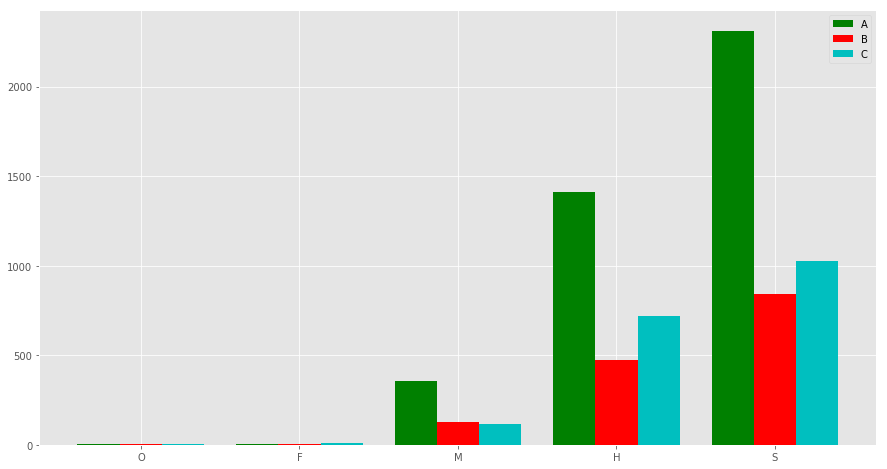

In [30]:
#'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'
size = 5
x = np.arange(size)
a = np.array(a_[:5])
b = np.array(b_[:5])
c = np.array(c_[:5])
plt.style.use('ggplot')
total_width, n = 0.8, 3
width = total_width / n
x = x - (total_width - width) / 2
plt.figure(figsize=(15,8))
plt.bar(x, a,  width=width,color ='g' , label='A')
plt.bar(x + width, b, width=width,color ='r', label='B')
plt.bar(x + 2 * width, c, width=width, color ='c',label='C')
LABELS = name_list
plt.xticks(x + width, LABELS)

plt.legend()
plt.show()